In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv('iris.data')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='5.1', ylabel='3.5'>

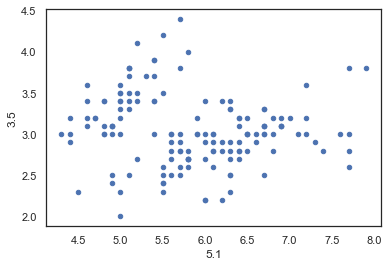

In [9]:
sns.set(style='white' , color_codes=True)
iris.plot(kind='scatter',x='5.1',y='3.5')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='1.4', ylabel='0.2'>

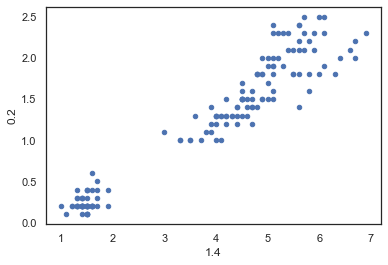

In [11]:
iris.plot(kind='scatter', x='1.4', y='0.2')

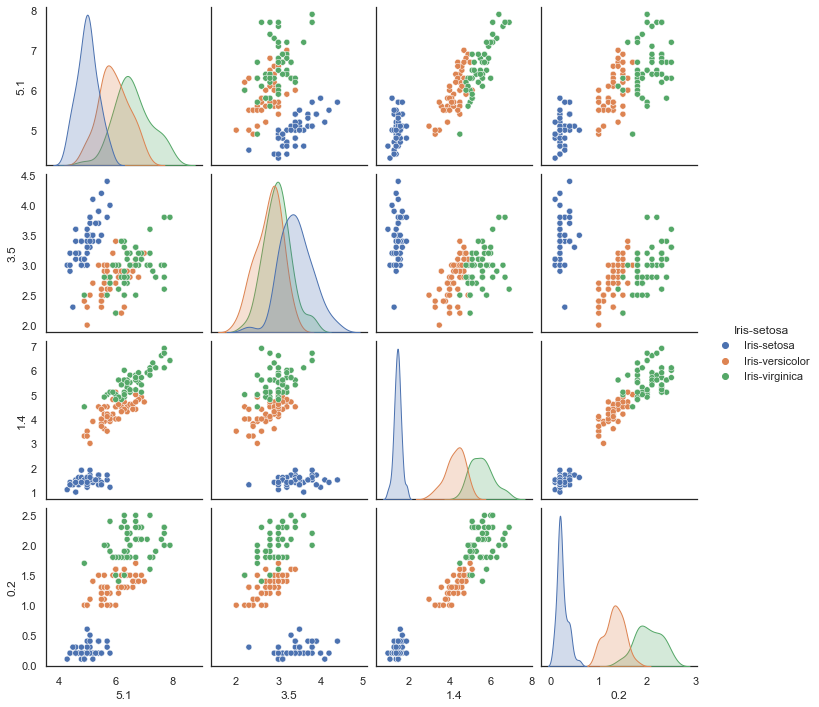

In [16]:
sns.pairplot(data=iris, hue='Iris-setosa')

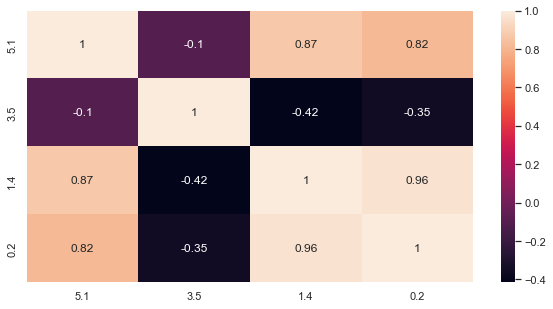

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(), annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = iris.drop(['Iris-setosa'], axis=1)
y = iris['Iris-setosa']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 4)
(45, 4)
(104,)
(45,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
prediction = dtree.predict(x_test)

In [30]:
df = pd.DataFrame({'Real':y_test, 'Prediction':prediction})
df.head()

,Real,Prediction
128,Iris-virginica,Iris-versicolor
11,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-versicolor
15,Iris-setosa,Iris-setosa
123,Iris-virginica,Iris-virginica


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [32]:
print(accuracy_score(y_test, prediction)*100)

93.33333333333333


[Text(390.6, 398.64, 'Petal Length <= 2.6\ngini = 0.663\nsamples = 104\nvalue = [33, 40, 31]\nclass = Versicolor'),
 Text(292.95000000000005, 326.15999999999997, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Setosa'),
 Text(488.25, 326.15999999999997, 'Petal Width <= 1.75\ngini = 0.492\nsamples = 71\nvalue = [0, 40, 31]\nclass = Versicolor'),
 Text(390.6, 253.67999999999998, 'Petal Length <= 5.05\ngini = 0.13\nsamples = 43\nvalue = [0, 40, 3]\nclass = Versicolor'),
 Text(195.3, 181.2, 'Petal Width <= 1.65\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]\nclass = Versicolor'),
 Text(97.65, 108.71999999999997, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Versicolor'),
 Text(292.95000000000005, 108.71999999999997, 'Sepal Length <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(195.3, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(390.6, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]

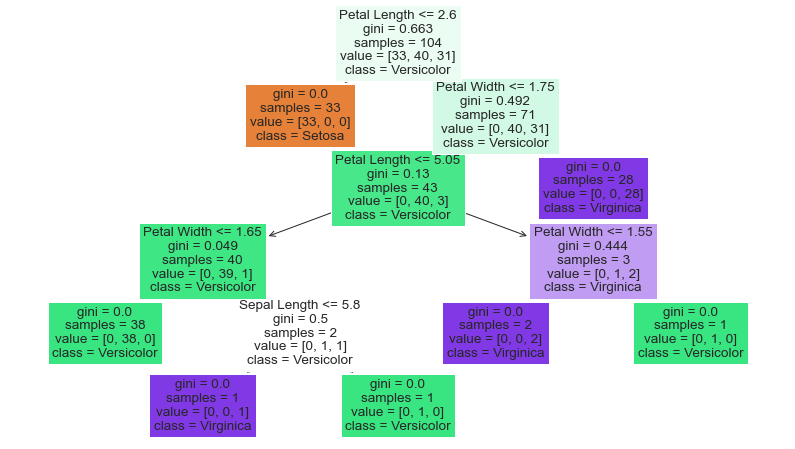

In [33]:
plt.figure(figsize=(14,8))
dimen_arr = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
flow_arr = ["Setosa", "Versicolor", "Virginica"]
plot_tree(dtree,feature_names = dimen_arr, class_names = flow_arr , filled = True)

[Text(390.6, 398.64, 'Petal Length <= 2.45\ngini = 0.667\nsamples = 149\nvalue = [49, 50, 50]\nclass = Versicolor'),
 Text(330.50769230769237, 326.15999999999997, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]\nclass = Setosa'),
 Text(450.69230769230774, 326.15999999999997, 'Petal Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(240.3692307692308, 253.67999999999998, 'Petal Length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(120.1846153846154, 181.2, 'Petal Width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(60.0923076923077, 108.71999999999997, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(180.27692307692308, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(360.55384615384617, 181.2, 'Petal Width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(300.4615384615385, 

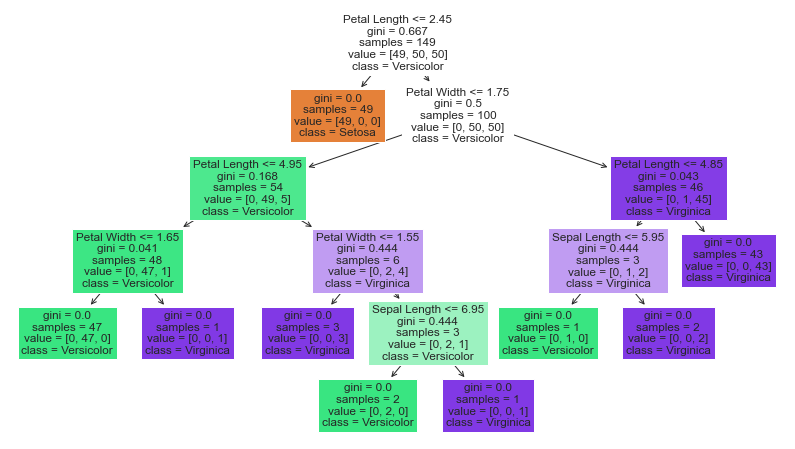

In [35]:
model = DecisionTreeClassifier().fit(x,y)
plt.figure(figsize=(14,8))
plot_tree(model,feature_names = dimen_arr, class_names = flow_arr , filled = True)